Machine Learning is a subset of Artificial Intelligence, in which we use datasets in order to teach a machine how to recognize certain patterns or generate predictions. Machine Learning is useful in many different areas and has many aplications. Social Media for example uses Machine Learning in order to generate a "for you page", the algorithim takes the data set of content and or media that you have liked, engaged with, and spent the most time on and uses it to find more content that alligns with the pattern it recogonizes as your certian taste. Machine Learning is also used in recognition for example you could trian an Artificial Intelligence to differentiate different fruits. You would do this by feeding it a little data at a time and then testing it. Machine Learning can struggle in cases where there simply is not enough data or the wrong type of data, for example if you feed Artificial Intelligence data regarding vegetable recognition and then ask it to differentiate different types of fruits it will not be able to do so because it does not have data on fruits, it has data on vegetables. Machine Learning can be really effective for certain tasks but at the end of the day at least for now Machine Learning is not equivilant to human cababilities. Machine Learning is data dependent and cannot function with the data.

In [235]:
import pandas as pd
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Number 1

In [236]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [237]:
"""""
the goal here is to make the data easier to understand so the first thing that I did here was to clarify 
where each passenger embarked from.
"""
titanic_df["Embarked"]=np.where(titanic_df["Embarked"]== "C","Cherbourg",
                                    np.where(titanic_df["Embarked"]=="Q","Queensland","Southhampton"))
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southhampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southhampton


In [238]:
"""
Here I renamed the columns so that people can understand what the column means and therefore better understand 
the data
"""
titanic_df.rename(columns = {"SibSp":"Siblings/Spuoses", "Pclass":"Passenger Class"}, inplace=True)
print(titanic_df.columns)
titanic_df

Index(['PassengerId', 'Survived', 'Passenger Class', 'Name', 'Sex', 'Age',
       'Siblings/Spuoses', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Passenger Class,Name,Sex,Age,Siblings/Spuoses,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southhampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southhampton
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,Southhampton
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,Southhampton
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,Southhampton
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,Cherbourg


In [239]:
titanic_df =pd.get_dummies(titanic_df[["Survived", "Passenger Class", "Sex"]])
titanic_df

,Survived,Passenger Class,Sex_female,Sex_male
0,0,3,False,True
1,1,1,True,False
2,1,3,True,False
3,1,1,True,False
4,0,3,False,True
...,...,...,...,...
886,0,2,False,True
887,1,1,True,False
888,0,3,True,False
889,1,1,False,True


Number 2

In [240]:
titanic_df = pd.read_csv("titanic.csv")


In [241]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: >

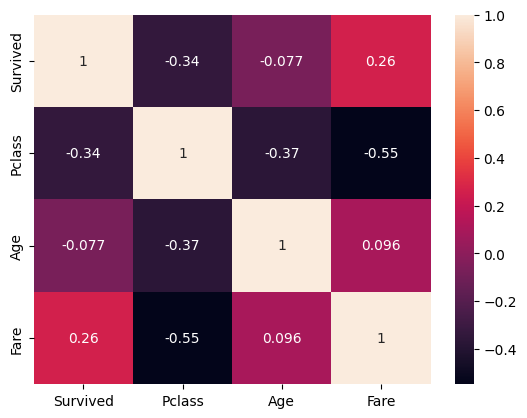

In [242]:
sns.heatmap(titanic_df[["Survived","Pclass","Age", "Fare"]].corr(), annot=True)

There is a slight negative correlation between passenger class and survival, also pclass and Age. Fare and Survival rate is the only significant positive correlation. Passenger Class and Fare have the strongest correlation.

Number 3

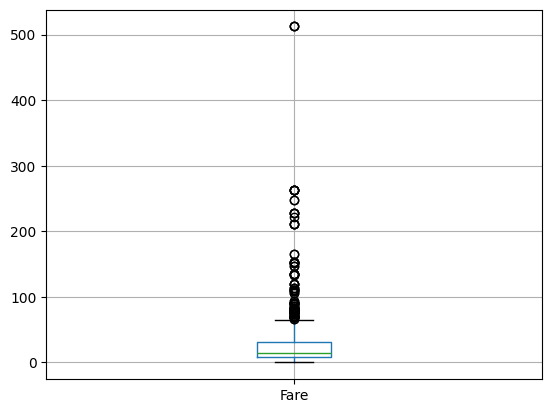

In [243]:
boxplot = titanic_df.boxplot(column = ["Fare"], return_type="axes")

It shows the basic data of the "Fare" column, it shows the mean, mode, and range of the data. we can see that there is an outlier above 500 that probably skews the data.

Number 4

In [244]:

import time
time_1 = time.perf_counter()
titanic_df["Age_bin"] = titanic_df["Age"].apply(lambda x: "child" if x < 10 else
"Teen" if x < 18 else "Adult" if x < 50 else "Old")
time_2 = time.perf_counter()
print(time_2 - time_1)
titanic_df   

0.0020893998444080353


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Old
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Adult


In [245]:
titanic_df["TicketAge_bin_np"] = np.where(titanic_df["Age"] < 10, "Child",
np.where(titanic_df["Age"] < 18, "Teen",
np.where(titanic_df["Age"] < 50, "Adult",
np.where(titanic_df["Age"] < 100,"Old",""))))
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin,TicketAge_bin_np
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Adult,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Adult,Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Old,
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Adult,Adult


I used the lambda function so that I can shorten the time it takes to compute the information, in other words it only looks at the important aspects.

Number 5

In [246]:
child_df = titanic_df.loc[titanic_df["Age_bin"] == "Child"]
teen_df = titanic_df.loc[titanic_df["Age_bin"] == "Teen"]
adult_df = titanic_df.loc[titanic_df["Age_bin"] == "Adult"]
old_df = titanic_df.loc[titanic_df["Age_bin"] == "Old"]


Text(0.5, 1.0, 'Old')

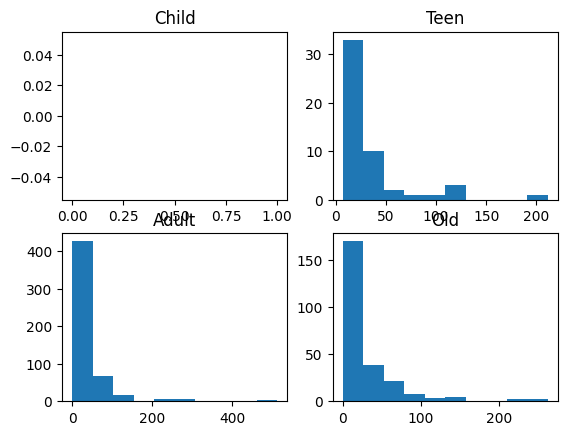

In [247]:
x = child_df["Fare"]
plt.subplot(2,2,1)
plt.hist(x)
plt.title("Child")
x = teen_df["Fare"]
plt.subplot(2,2,2)
plt.hist(x)
plt.title("Teen")
x = adult_df["Fare"]
plt.subplot(2,2,3)
plt.hist(x)
plt.title("Adult")
x = old_df["Fares"]
plt.subplot(2,2,4)
plt.hist(x)
plt.title("Old")

Children under 10 did not have to pay fares, Teens had to pay fares but most were low the same goes for adults and Old people.